# Analysis of Smart Watches

Data: Here the data is taken from where the Kaggle and assumption is made that the there is no doubt about the integrity of the 
that has been shared.

Problem Statement: The focus is to analyse the data and explore it to provide insights which is critical for the stakholders in decision making

Note: When providing insights using hypothesis test like Annova , spearman, kruskal etc we used 0.05 level of significance as benchmark in our  inferencial analysis.

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
import plotly.express as px

#!pip install scikit_posthocs

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scikit_posthocs

### Methodology

The object was to find the feature which impacts the rating of smart watches so that stackholder can take better decision like 
which brands are popular?, IS there any link with dial shape and ratings etc.

First the data was cleaned. Later, it was analyzed thoroughly using descriptive analysis, data visualization and hypothesis testing.

### Read data

In [220]:
data = pd.read_csv('smartwatches.csv')
data.head()

,Serial Number,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


 ## Descriptive Analysis

In [221]:
rows, cols = data.shape
print(f"Total rows in the data are {rows}. The number of columns are {cols}")

Total rows in the data are 450. The number of columns are 16


In [222]:
data.dtypes # checking the data types of each column

Serial Number            int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [223]:
print('Categorical columns')
for col in data.select_dtypes(include=object).columns: 
    print(col,end=', ')
print('\n')
print('Numerical columns')
for col in data.select_dtypes(exclude=object).columns: 
    print(col,end=', ')

Categorical columns
Brand, Model Name, Dial Shape, Strap Color, Strap Material, Touchscreen, Bluetooth, Display Size, Weight, 

Numerical columns
Serial Number, Current Price, Original Price, Discount Percentage, Rating, Number OF Ratings, Battery Life (Days), 

In [9]:
print('Five point summay for numerical variables')
data.drop(['Serial Number'],axis=1).describe()

Five point summay for numerical variables


,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,440.000000,377.000000,377.000000,444.000000,391.000000,418.000000
mean,12747.554545,14598.204244,48.236894,4.031306,11594.726343,14.077392
std,17760.666099,15450.028869,24.109830,0.550548,40423.889227,7.718503
min,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,2180.750000,5999.000000,33.337037,3.900000,68.500000,8.000000
50%,3999.000000,7999.000000,54.550414,4.100000,996.000000,17.500000
75%,17121.750000,17999.000000,66.677780,4.300000,6022.000000,22.000000
max,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


The mean and median for the rating and battery life is not similar , it idicate that the these feature does seem normally distributed

In [10]:
print('Five point summay for categorical variables')
data.select_dtypes(include=object).describe()

Five point summay for categorical variables


,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight
count,450,415,327,327,381,413,444,420,264
unique,18,389,6,30,15,2,2,40,5
top,fire-boltt,beast pro,Circle,Black,Silicon,Yes,Yes,1.7 inches,20 - 35 g
freq,60,5,131,133,248,389,440,68,80


In [11]:
print('Types of brand present in the data')
for ind,brand in enumerate(data['Brand'].unique()):
    print(ind+1,brand)

Types of brand present in the data
1 noise
2 fire-boltt
3 boat
4 honor
5 crossbeats
6 samsung
7 garmin
8 huawei
9 dizo
10 gizmore
11 ambrane
12 zebronics
13 pebble
14 hammer
15 apple
16 fitbit
17 amazfit
18 fossil


In [12]:
print(f"Number of model name present in the data = {data['Model Name'].nunique()}")

Number of model name present in the data = 389


In [13]:
print(f"Number of Dial Shape present in the data = {data['Dial Shape'].nunique()}")
print('Types of model present in the data')
for ind,brand in enumerate(data['Dial Shape'].unique()):
    print(ind+1,brand) # here nan is not shape but empty cell

Number of Dial Shape present in the data = 6
Types of model present in the data
1 nan
2 Rectangle
3 Square
4 Circle
5 Curved
6 Contemporary
7 Oval


In [14]:
print(f"Number of Strap Color present in the data = {data['Strap Color'].nunique()}")
print('Types of model present in the data')
for ind,brand in enumerate(data['Strap Color'].unique()):
    print(ind+1,brand) # here nan is empty cell

Number of Strap Color present in the data = 30
Types of model present in the data
1 nan
2 Midnight
3 Starlight Sport
4 Black
5 Pink
6 Orange Alpine
7 Green
8 Gold
9 Blue
10 Silver
11 White
12 Grey
13 Red
14 Purple
15 Brown
16 Graphite
17 Beige
18 Morning Glow
19 Passion Pink
20 Beet Juice
21 Charcoal
22 White Platinum
23 Multicolor
24 Misty Rose
25 Orange
26 Burgundy
27 Maroon
28 Pink, Gold
29 Deep Wine
30 Sea Green
31 Rose Gold


In [15]:
print(f"Number of Strap Material present in the data = {data['Strap Material'].nunique()}")
print('Types of model present in the data')
for ind,brand in enumerate(data['Strap Material'].unique()):
    print(ind+1,brand) # here nan is empty cell

Number of Strap Material present in the data = 15
Types of model present in the data
1 nan
2 Silicon
3 Other
4 Polycarbonate
5 Metal
6 Stainless Steel
7 Carbon-Fiber;
8 Plastic
9 Fabric
10 Aluminium
11 Thermo Plastic Polyurethene
12 Synthetic
13 Fluoroelastomer
14 Leather
15 Nylon
16 Rubber


In [16]:
print('Types of TouchScreen present in the data')
for ind,brand in enumerate(data['Touchscreen'].unique()):
    print(ind+1,brand) # here nan is empty cell

Types of TouchScreen present in the data
1 nan
2 Yes
3 No


In [17]:
print('Types of Bluetooth present in the data')
for ind,brand in enumerate(data['Bluetooth'].unique()):
    print(ind+1,brand) # here nan is empty cell

Types of Bluetooth present in the data
1 Yes
2 nan
3 No


In [18]:
print('Types of Display Size present in the data')
for ind,brand in enumerate(data['Display Size'].unique()):
    print(ind+1,brand) # here nan is empty cell

Types of Display Size present in the data
1 nan
2 1.8 inches
3 1.7 inches
4 1.4 inches
5 1.9 inches
6 1.3 inches
7 1.5 inches
8 1.2 inches
9 4.6 inches
10 4.4 inches
11 35.9 inches
12 30.0 inches
13 0.5 inches
14 4.3 inches
15 1.1 inches
16 2.0 inches
17 3.5 inches
18 4.5 inches
19 1.6 inches
20 4.0 inches
21 1.0 inches
22 0.2 inches
23 0.6 inches
24 15.9 inches
25 3.0 inches
26 0.1 inches
27 33.0 inches
28 0.9 inches
29 27.9 inches
30 18.5 inches
31 0.8 inches
32 4.2 inches
33 45.0 inches
34 20.0 inches
35 2.1 inches
36 0.0 inches
37 3.3 inches
38 6.9 inches
39 2.3 inches
40 2.7 inches
41 2.4 inches


In [19]:
print('Types of Weight present in the data')
for ind,brand in enumerate(data['Weight'].unique()):
    print(ind+1,brand) # here nan is empty cell

Types of Weight present in the data
1 35 - 50 g
2 50 - 75 g
3 75g +
4 20 - 35 g
5 <= 20 g
6 nan


In [20]:
for col in data.select_dtypes(include=object).columns: 
    print(f"Column's name = {col}, number of value's type = {data[col].nunique()}")

Column's name = Brand, number of value's type = 18
Column's name = Model Name, number of value's type = 389
Column's name = Dial Shape, number of value's type = 6
Column's name = Strap Color, number of value's type = 30
Column's name = Strap Material, number of value's type = 15
Column's name = Touchscreen, number of value's type = 2
Column's name = Bluetooth, number of value's type = 2
Column's name = Display Size, number of value's type = 40
Column's name = Weight, number of value's type = 5


There are some variables that require cleaning we need to check these first,later we can carry on with our descriptive analysis

For example, the weight and display sizes should be converted into numerical values 

## Data Cleaning 

In [21]:
print("Checking the duplicate values")
data.duplicated().sum() 

Checking the duplicate values


0

There are no duplicated values present in the data

In [22]:
print("Checking the null values percentage in each feature")
data.isnull().sum()/len(data)*100

Checking the null values percentage in each feature


Serial Number           0.000000
Brand                   0.000000
Current Price           2.222222
Original Price         16.222222
Discount Percentage    16.222222
Rating                  1.333333
Number OF Ratings      13.111111
Model Name              7.777778
Dial Shape             27.333333
Strap Color            27.333333
Strap Material         15.333333
Touchscreen             8.222222
Battery Life (Days)     7.111111
Bluetooth               1.333333
Display Size            6.666667
Weight                 41.333333
dtype: float64

Null values are present in the data

### Dealing with nulll values

In [23]:
# using imputer to replace the null values
ImputerNumeric = SimpleImputer(strategy='median') 
ImputerCategorical = SimpleImputer(strategy='most_frequent')
# here the numerical columns are replaced with median and categorical columns null values with the mode
catCol = data.select_dtypes(include=object).columns # categorical columns list
NumCol = data.select_dtypes(exclude=object).columns # numerical columns list

# Filling null values
ImputerNumeric.fit(data[NumCol])
ImputerCategorical.fit(data[catCol])
numArray =ImputerNumeric.transform(data[NumCol])
catArray = ImputerCategorical.transform(data[catCol])

In [24]:
numPanda = pd.DataFrame(numArray,columns=NumCol)
numPanda.head() # converting numerical matrix to pandas DataFrame

,Serial Number,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
0,0.0,82990.0,89900.0,7.686318,4.0,65.0,8.0
1,1.0,3799.0,16999.0,77.651627,4.3,20788.0,3.5
2,2.0,1999.0,7990.0,74.981227,3.8,21724.0,8.0
3,3.0,1799.0,19999.0,91.004550,4.3,13244.0,3.5
4,4.0,1599.0,4999.0,68.013603,4.1,13901.0,8.0


In [25]:
catPanda = pd.DataFrame(catArray,columns=catCol)
catPanda.head() # converting categorical matrix to pandas Data Frame

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight
0,noise,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,Circle,Black,Silicon,Yes,Yes,1.7 inches,35 - 50 g
1,fire-boltt,BSW046,Circle,Black,Silicon,Yes,Yes,1.8 inches,50 - 75 g
2,boat,Wave Call,Circle,Black,Silicon,Yes,Yes,1.7 inches,35 - 50 g
3,fire-boltt,BSW053,Circle,Black,Silicon,Yes,Yes,1.8 inches,75g +
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,Circle,Black,Other,Yes,Yes,1.7 inches,35 - 50 g


In [26]:
try: # deleting array as they are occuping the extra space in the memory
    del numArray
    del catArray
except:
    pass

In [27]:
updatedData = pd.merge(left =catPanda, right= numPanda, left_index=True, right_index=True)
updatedData.head() # merging the categorical and numerical obtained after the transformation

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight,Serial Number,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
0,noise,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,Circle,Black,Silicon,Yes,Yes,1.7 inches,35 - 50 g,0.0,82990.0,89900.0,7.686318,4.0,65.0,8.0
1,fire-boltt,BSW046,Circle,Black,Silicon,Yes,Yes,1.8 inches,50 - 75 g,1.0,3799.0,16999.0,77.651627,4.3,20788.0,3.5
2,boat,Wave Call,Circle,Black,Silicon,Yes,Yes,1.7 inches,35 - 50 g,2.0,1999.0,7990.0,74.981227,3.8,21724.0,8.0
3,fire-boltt,BSW053,Circle,Black,Silicon,Yes,Yes,1.8 inches,75g +,3.0,1799.0,19999.0,91.004550,4.3,13244.0,3.5
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,Circle,Black,Other,Yes,Yes,1.7 inches,35 - 50 g,4.0,1599.0,4999.0,68.013603,4.1,13901.0,8.0


In [28]:
try: # deleted the Data frame as it is no longer required
    del data
except:
    pass

In [29]:
def cleanDisplaySize(series):  # function to extract the numberic data from string
    for value in series:
        toReturn=''
        for char in series:
            if str.isnumeric(char) or char=='.':
                toReturn= toReturn+char
        return toReturn

In [30]:
updatedData['Display Size'].apply(cleanDisplaySize)

0      1.7
1      1.8
2      1.7
3      1.8
4      1.7
      ... 
445    1.3
446    0.1
447    1.3
448    0.1
449    0.1
Name: Display Size, Length: 450, dtype: object

In [31]:
# Cleaning the Display size and weight
updatedData['Display Size']= updatedData['Display Size'].apply(cleanDisplaySize)
updatedData['Display Size']  = updatedData['Display Size'].apply(lambda val: float(val))

In [32]:
def cleanWeight(series): # function to remove the unnecessary string from the weight
    for value in series:
        toReturn=''
        for char in series:
            if str.isnumeric(char) or char=='-' or char=='+' or char=='<' or char=='>':
                toReturn= toReturn+char
        return toReturn

In [33]:
updatedData['Weight'] = updatedData['Weight'].apply(cleanWeight)

# Data Visualization and Descriptive analysis

### Brand

In [34]:
# Smart watch brand with highest average rating
pd.pivot_table(updatedData,values=['Rating'],index = 'Brand').sort_values('Rating',ascending=False)

,Rating
Brand,
apple,4.553846
garmin,4.441463
fitbit,4.428571
huawei,4.313333
honor,4.235714
samsung,4.223333
amazfit,4.142857
crossbeats,4.100000
ambrane,4.081818


It shows the rating of apple, garmin anf fitbit brand is very high while fire-bolt and hammer lies at the bottom

In [35]:
# Smart watch brand with highest average rating
temp = pd.pivot_table(updatedData,values='Rating',index = 'Brand').sort_values(by='Rating',ascending=False)
temp['Count'] = pd.pivot_table(updatedData,values='Rating',index = 'Brand',aggfunc='count')
temp['countPercentage']= pd.pivot_table(updatedData,values='Rating',index = 'Brand',aggfunc='count')/len(updatedData)*100
temp

,Rating,Count,countPercentage
Brand,,,
apple,4.553846,26,5.777778
garmin,4.441463,41,9.111111
fitbit,4.428571,21,4.666667
huawei,4.313333,15,3.333333
honor,4.235714,14,3.111111
samsung,4.223333,30,6.666667
amazfit,4.142857,14,3.111111
crossbeats,4.100000,4,0.888889
ambrane,4.081818,11,2.444444


Using count of rating, it is clear that Hammer and Crossbeats rating is not very reliable as very feat data is there for the anlysis of these brand

In [36]:
# Smart watch brand with highest current price from top to bottom
price = pd.pivot_table(updatedData,values='Current Price',index = 'Brand').sort_values(by='Current Price',ascending=False)
price['Count'] = pd.pivot_table(updatedData,values='Current Price',index = 'Brand',aggfunc='count')
price['countPercentage']= pd.pivot_table(updatedData,values='Rating',index = 'Brand',aggfunc='count')/len(updatedData)*100
price

,Current Price,Count,countPercentage
Brand,,,
apple,43161.307692,26,5.777778
garmin,42210.170732,41,9.111111
samsung,24601.633333,30,6.666667
fitbit,17045.761905,21,4.666667
fossil,15232.666667,24,5.333333
huawei,15159.133333,15,3.333333
honor,10373.857143,14,3.111111
amazfit,10084.785714,14,3.111111
crossbeats,4249.000000,4,0.888889


From it is clear that the most rated brand as well expensive are apple and garmin

In [38]:
# Smart watch brand with highest average 
pd.pivot_table(updatedData,values=['Battery Life (Days)'],index = 'Brand').sort_values(by='Battery Life (Days)',ascending=False)

,Battery Life (Days)
Brand,
apple,21.288462
ambrane,19.863636
hammer,17.500000
dizo,16.780000
fossil,16.645833
boat,15.593750
garmin,15.487805
zebronics,15.325758
pebble,14.530303


The average battery life offered by brand like Apple , Ambrane, Hammer is very high.Samsung and Crossbeats lies at the bottom
,rest brands provide average battery life of 15 to 16 hours

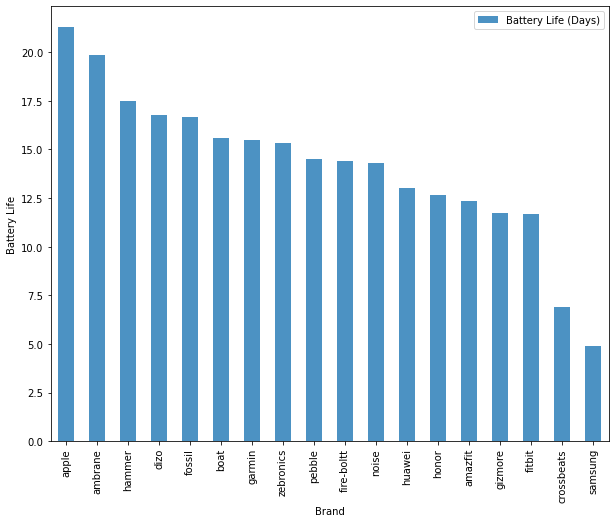

In [172]:

toPlot = pd.pivot_table(updatedData[['Brand', "Battery Life (Days)"]],values='Battery Life (Days)',index='Brand').sort_values(
by = 'Battery Life (Days)',ascending=False)
toPlot.plot(kind ='bar',figsize =(10,8),alpha =0.8)
plt.ylabel("Battery Life")
plt.show()

Above bar graphs depicts that averge battery life for apple,ambrane is very good while leas for crossbeats and samsung

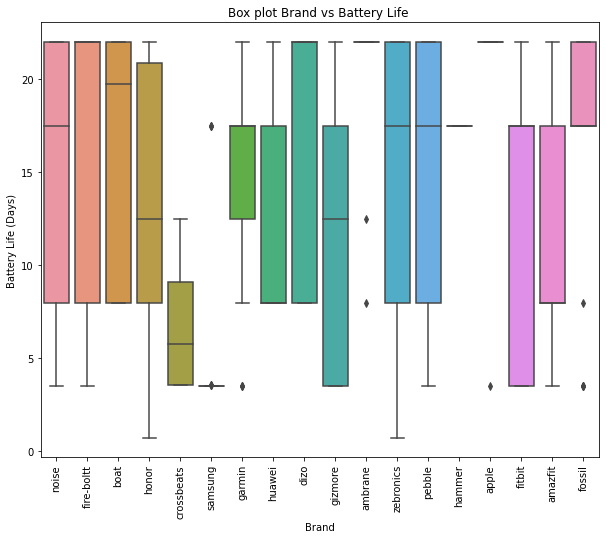

In [175]:
plt.figure(figsize=(10,8))
plt.title("Box plot Brand vs Battery Life ")
sns.boxplot(x=updatedData['Brand'] ,y = updatedData['Battery Life (Days)'])
plt.xticks(rotation=90)
plt.show()

If battery life is considered only criterion to buy then apple and ambrane are best , these are the highly reliable brand
with very lest variability 

In [189]:
# finding coefVariance
coefVarinace =pd.pivot_table(data =updatedData,values ='Battery Life (Days)', index='Brand',aggfunc='std')/pd.pivot_table(
    data =updatedData,values ='Battery Life (Days)', index='Brand')
coefVarinace = coefVarinace.sort_values(by ='Battery Life (Days)')
coefVarinace

,Battery Life (Days)
Brand,
apple,0.170428
ambrane,0.244590
garmin,0.363206
dizo,0.388041
fossil,0.407688
huawei,0.441347
boat,0.441781
noise,0.481056
pebble,0.487094


The low value of coefficient of variance indiacates hight reliability of the brand apple , ambrane, garmin and dizo
while as fire-bolt, cross-beats, honor, gizmore, fitbit and samsung offers very less reliability when battery is considered as the perfomance criterion

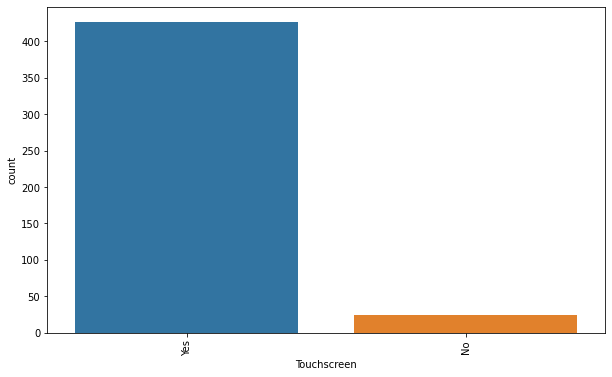

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x=updatedData['Touchscreen'])
plt.xticks(rotation=90)
plt.show()

From above countplot it is clear that all smart watches offer touchscreen feature

In [41]:
print("Total smart watch with no touchscreen feature",len(updatedData[updatedData['Touchscreen']=='No']))
print("Details of no touchsreen smart watch")
updatedData[updatedData['Touchscreen']=='No']

Total smart watch with no touchscreen feature 24
Details of no touchsreen smart watch


,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight,Serial Number,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
253,garmin,"Forerunner 255, GPS Running Smartwatch, Advanc...",Circle,Grey,Silicon,No,Yes,1.3,20-35,253.0,39490.0,7999.0,54.550414,5.0,6.0,8.0
255,garmin,"Forerunner 245 Music, GPS Running Smartwatch, ...",Circle,Red,Silicon,No,Yes,1.2,20-35,255.0,24990.0,36490.0,31.515484,4.4,43.0,22.0
256,garmin,"Forerunner 745, GPS Multisport Watch, Training...",Circle,Red,Silicon,No,Yes,1.2,20-35,256.0,34990.0,51990.0,32.698596,4.3,6.0,22.0
259,garmin,"Forerunner 955 Solar charging upto 20 days, HR...",Circle,White,Silicon,No,Yes,1.3,75+,259.0,67490.0,7999.0,54.550414,4.7,996.0,8.0
260,garmin,"Forerunner 55, GPS Smartwatch, upto 2 Weeks of...",Circle,Blue,Silicon,No,Yes,1.0,20-35,260.0,20990.0,7999.0,54.550414,4.2,61.0,22.0
263,garmin,"Instinct 2 Solar, Rugged Outdoor SmartWatch, M...",Circle,Blue,Silicon,No,Yes,0.9,20-35,263.0,44990.0,50490.0,10.893246,4.0,6.0,17.5
264,garmin,"Instinct Esports Edition, Broadcast stress lev...",Circle,Black,Silicon,No,Yes,0.9,20-35,264.0,22990.0,31490.0,26.992696,4.1,20.0,8.0
265,garmin,"Instinct 2, Battery Upto 28 days, Tracback Rou...",Circle,Black,Silicon,No,Yes,0.9,20-35,265.0,33490.0,36990.0,9.462017,4.6,5.0,17.5
268,garmin,Vivomove Sports,Circle,Brown,Silicon,No,Yes,18.5,20-35,268.0,20490.0,7999.0,54.550414,5.0,3.0,3.5
271,garmin,"Instinct 2 Solar, Battery Up to 28 days/Unlimi...",Circle,Black,Silicon,No,Yes,0.9,20-35,271.0,44990.0,46990.0,4.256225,4.0,6.0,17.5


The above table provides insights that only garmin and fossils are the brand that provide without touch screen smart watch
and most of these have circula dial shape 

The other important fact to notice is that many of these watches have very good rating and battery life

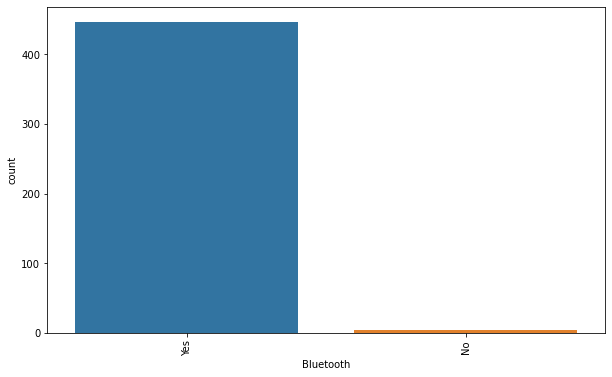

In [190]:
plt.figure(figsize=(10,6))
sns.countplot(x=updatedData['Bluetooth'])
plt.xticks(rotation=90)
plt.show()

Number of watches that contain no Bluetooth feature are very less

In [191]:
updatedData[updatedData['Bluetooth']=='No']

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight,Serial Number,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
218,fitbit,fitbit charge 5 blue,Rectangle,Blue,Silicon,Yes,No,1.3,20-35,218.0,14999.0,7999.0,54.550414,4.7,5.0,3.5
219,fitbit,fitbit charge 5 black,Rectangle,Black,Silicon,Yes,No,0.2,20-35,219.0,14999.0,7999.0,54.550414,4.7,6.0,3.5
222,fitbit,FitbitInspire 3 Health & Fitness Tracker (Lila...,Rectangle,Passion Pink,Rubber,Yes,No,0.2,20-35,222.0,8999.0,7999.0,54.550414,4.7,996.0,3.5
273,garmin,"Instinct 2S, Battery Upto 21 days, Health Snap...",Circle,Red,Silicon,No,No,0.8,20-35,273.0,33490.0,39490.0,15.193720,4.7,109.0,17.5


Only four smart watches are there with no  bluetooth feature 

### Checking whether the Dial shape, Strap color , Touchscreen feature, Bluetooth, Strap Material, Dial shape and Brand impact ratings or not

C:\Users\rishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


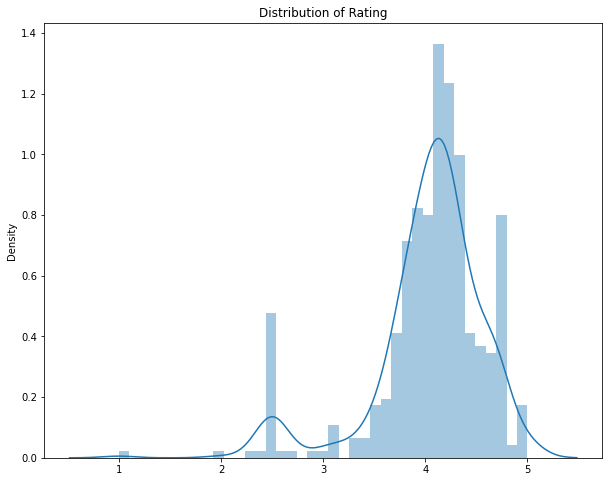

In [199]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Rating')
sns.distplot(x=updatedData["Rating"])
plt.show()

The above curve is not bell shape,it appears that the ratings are not normally distributed

In [200]:
stats.shapiro(updatedData['Rating']) # checking normally distribution of rating

ShapiroResult(statistic=0.8609055876731873, pvalue=1.4352205305724152e-19)

Normality fails, cannot go ahead with parametric test. Need to choose substitue of ANNOVA that is Kruskal test for the 
analysis

### Does touchscreen feature impacts ratings?

In [45]:
# checking rating with TouchScree 
# Creating nulll and alternate hypothesis
# Ho: touchscreen and non touchscreen feature both have same rating mean
# H1: touchscreen and non touchscreen feaure both do not contain same rating mean

In [46]:
yes = updatedData[updatedData['Touchscreen']=='Yes']['Rating']
no  = updatedData[updatedData['Touchscreen']=='No']['Rating']

In [47]:
stats.kruskal(yes, no) # the test make it clear that there is a impact on rating with touchscreen feature 
# here p value of kruskal test is very less than 0.05 (level of significance).

KruskalResult(statistic=13.244388765951213, pvalue=0.00027339704448301535)

With Kruskal test it is concluded that p value is very less than 0.05, so rejecting null hypothesis , which conveys touchscreen feature impacts rating

In [201]:
pd.pivot_table(updatedData, values ='Rating', index='Touchscreen')

,Rating
Touchscreen,
No,4.404167
Yes,4.011268


Above data conveys that touchscreen feature decrease rating.

### Does bluetooth feature impacts ratings?

In [202]:
yesBluetooth= updatedData[updatedData['Bluetooth']=='Yes']['Rating']
noBluetooth  = updatedData[updatedData['Bluetooth']=='No']['Rating']
stats.kruskal(yesBluetooth,noBluetooth) # impact of bluetooth feature 


KruskalResult(statistic=9.29159255269179, pvalue=0.0023020794103591445)

P value of Kruskal test is very less compare to level of significance 0.05, rejecting null hypothesis, it means bluetooth feature 
impacts rating

In [204]:
pd.pivot_table(updatedData, values ='Rating', index='Bluetooth')

,Rating
Bluetooth,
No,4.700000
Yes,4.026233


Above analysis conveys that bluetooth feature impacts rating, providing this feature decreases rating

### Does dial shape impacts rating?

In [49]:
updatedData['Dial Shape'].value_counts()

Circle          254
Square          101
Rectangle        87
Curved            6
Contemporary      1
Oval              1
Name: Dial Shape, dtype: int64

In [206]:
dialCircle = updatedData[updatedData['Dial Shape']=='Circle']['Rating']
dialSquare =updatedData[updatedData['Dial Shape']=='Square']['Rating']
dialRectangle=updatedData[updatedData['Dial Shape']=='Rectangle']['Rating']
dialCurved=updatedData[updatedData['Dial Shape']=='Curved']['Rating']
dialContemp=updatedData[updatedData['Dial Shape']=='Contemporary']['Rating']
dialOval=updatedData[updatedData['Dial Shape']=='Oval']['Rating']
print("Kruskal Test")
stats.kruskal(dialCircle,dialSquare, dialRectangle,dialCurved, dialContemp,dialOval)
# dial shape impacts rating

Kruskal Test


KruskalResult(statistic=30.824934573122142, pvalue=1.0143039972827095e-05)

Very less p value conveys that dial shape effects rating. To investigate further we are suing post hoc analysis with Dunn's test

In [208]:
scikit_posthocs.posthoc_dunn(updatedData[['Dial Shape','Rating']],val_col='Rating',group_col='Dial Shape')

,Circle,Contemporary,Curved,Oval,Rectangle,Square
Circle,1.000000,0.715871,0.122331,0.129414,1.637974e-02,2.549663e-04
Contemporary,0.715871,1.000000,0.800121,0.182775,9.472639e-01,4.289383e-01
Curved,0.122331,0.800121,1.000000,0.045768,4.205243e-01,1.100356e-02
Oval,0.129414,0.182775,0.045768,1.000000,7.072808e-02,2.784402e-01
Rectangle,0.016380,0.947264,0.420524,0.070728,1.000000e+00,6.366588e-07
Square,0.000255,0.428938,0.011004,0.278440,6.366588e-07,1.000000e+00


From above Dunn's test it is clear that 
pair( Circle, Rectangle),(Circle, Square),(curved, Oval), (Curved, Square) impacts the rating as their p value is very less than 0.05

In [64]:
pd.pivot_table(data =updatedData,values='Rating',index='Dial Shape').sort_values(by='Rating',ascending=False)

,Rating
Dial Shape,
Rectangle,4.204598
Contemporary,4.200000
Curved,4.150000
Circle,4.059055
Square,3.816832
Oval,3.100000


From above mean rating table with dial shape, it is clear rectangle and curved shape more likely to impact the rating while
oval and square shape effects the rating negatively.

From above data and Dunn's test it is clear that 

### Brand

In [72]:
updatedData['Brand'].value_counts()

fire-boltt    60
noise         43
garmin        41
pebble        33
zebronics     33
boat          32
samsung       30
apple         26
dizo          25
fossil        24
gizmore       23
fitbit        21
huawei        15
honor         14
amazfit       14
ambrane       11
crossbeats     4
hammer         1
Name: Brand, dtype: int64

In [209]:
listBoat= updatedData[updatedData['Brand']=='boat']['Rating']
listNoise = updatedData[updatedData['Brand']=='noise']['Rating']
listHonor= updatedData[updatedData['Brand']=='honor']['Rating']
listCross = updatedData[updatedData['Brand']=='crossbeats']['Rating']
listFire = updatedData[updatedData['Brand']=='fire-boltt']['Rating']
listSamsung =updatedData[updatedData['Brand']=='samsung']['Rating']
listGarmin=updatedData[updatedData['Brand']=='garmin']['Rating']
listDizo =updatedData[updatedData['Brand']=='dizo']['Rating']
listGiz =updatedData[updatedData['Brand']=='gizmore']['Rating']
listAmb =updatedData[updatedData['Brand']=='ambrane']['Rating']
listZeb =updatedData[updatedData['Brand']=='zebronics']['Rating']
listPeb =updatedData[updatedData['Brand']=='pebble']['Rating']
listHam =updatedData[updatedData['Brand']=='hammer']['Rating']
listApp = updatedData[updatedData['Brand']=='apple']['Rating']
listFit =updatedData[updatedData['Brand']=='fitbit']['Rating']
listAma =updatedData[updatedData['Brand']=='amazfit']['Rating']
listFoss= updatedData[updatedData['Brand']=='fossil']['Rating']
listHua = updatedData[updatedData['Brand']=='huawei']['Rating']

In [210]:
stats.kruskal(listBoat,
              listNoise,
              listHonor,
              listCross,
              listFire,
              listSamsung,
                listGarmin,
              listDizo,
              listGiz,
              listAmb,
              listZeb,
              listPeb,
              listHam,
              listApp,
              listFit,
              listAma,
              listFoss,
              listHua)  # applying Kruskal wali test on the Brand

KruskalResult(statistic=175.75088978767272, pvalue=2.024160866431655e-28)

p-value of test is very less , with more thann 99% confidence it is observed that brands impact the ratings

### Rating vs Battery Life

In [129]:
updatedData[["Rating","Battery Life (Days)"]].corr()

,Rating,Battery Life (Days)
Rating,1.000000,-0.097279
Battery Life (Days),-0.097279,1.000000


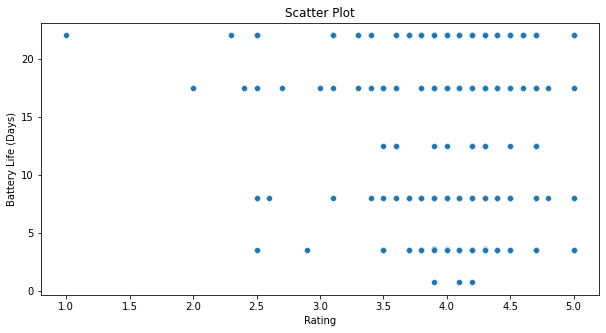

In [134]:
plt.figure(figsize=(10,5))
plt.title("Scatter Plot")
sns.scatterplot(x =updatedData["Rating"],y= updatedData['Battery Life (Days)'])
plt.show()

Scatter plot and correlation conveys that there is negligible linear relation between rating and battery life

In [213]:
stats.spearmanr(updatedData['Rating'],updatedData['Battery Life (Days)'])
# applying non parametric test spearman to confirm whether are insights are correct or not

SpearmanrResult(correlation=-0.0372676413237204, pvalue=0.4303217312814236)

p value is very high (greater than 95%), we fail to reject null hypothesis, it conveys that Ratings and Battery Life 
does not possess any significant linear relationship.

In [52]:
updatedData.drop('Serial Number',axis =1).corr()

,Display Size,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
Display Size,1.000000,-0.005116,0.003975,-0.018619,0.055914,-0.033428,0.022106
Current Price,-0.005116,1.000000,0.639679,-0.419858,0.385249,-0.127623,0.019945
Original Price,0.003975,0.639679,1.000000,-0.516275,0.246079,-0.103506,-0.115749
Discount Percentage,-0.018619,-0.419858,-0.516275,1.000000,-0.162623,0.182550,-0.000469
Rating,0.055914,0.385249,0.246079,-0.162623,1.000000,0.057164,-0.097279
Number OF Ratings,-0.033428,-0.127623,-0.103506,0.182550,0.057164,1.000000,0.027810
Battery Life (Days),0.022106,0.019945,-0.115749,-0.000469,-0.097279,0.027810,1.000000


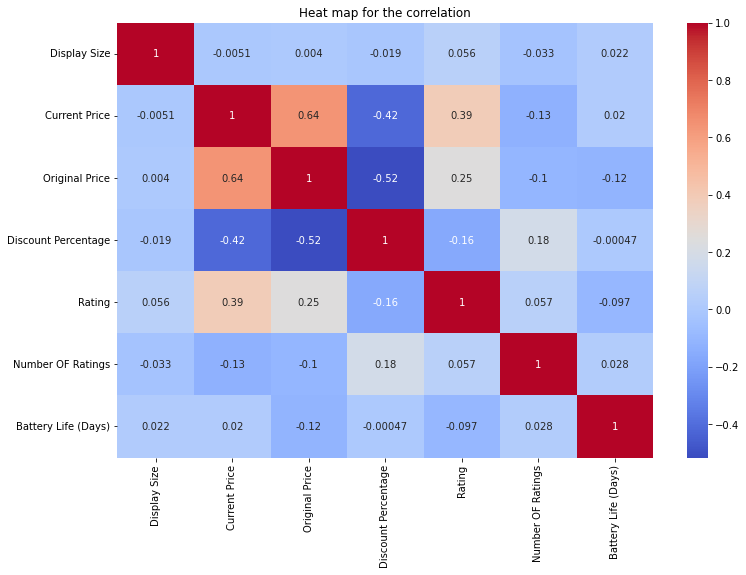

In [217]:
plt.figure(figsize=(12,8))
plt.title("Heat map for the correlation")
sns.heatmap(updatedData.drop('Serial Number',axis =1).corr(),annot=True,cmap = 'coolwarm' )
plt.xticks(rotation=90)
plt.show()

From above it is clear that original and current price are highly correlated positively which is obvious as both follow linear relationship

The other interesting fact is that  the curent price and original price  are midly correlated

Discount and original Price of smart watches also show moderate negative correlation

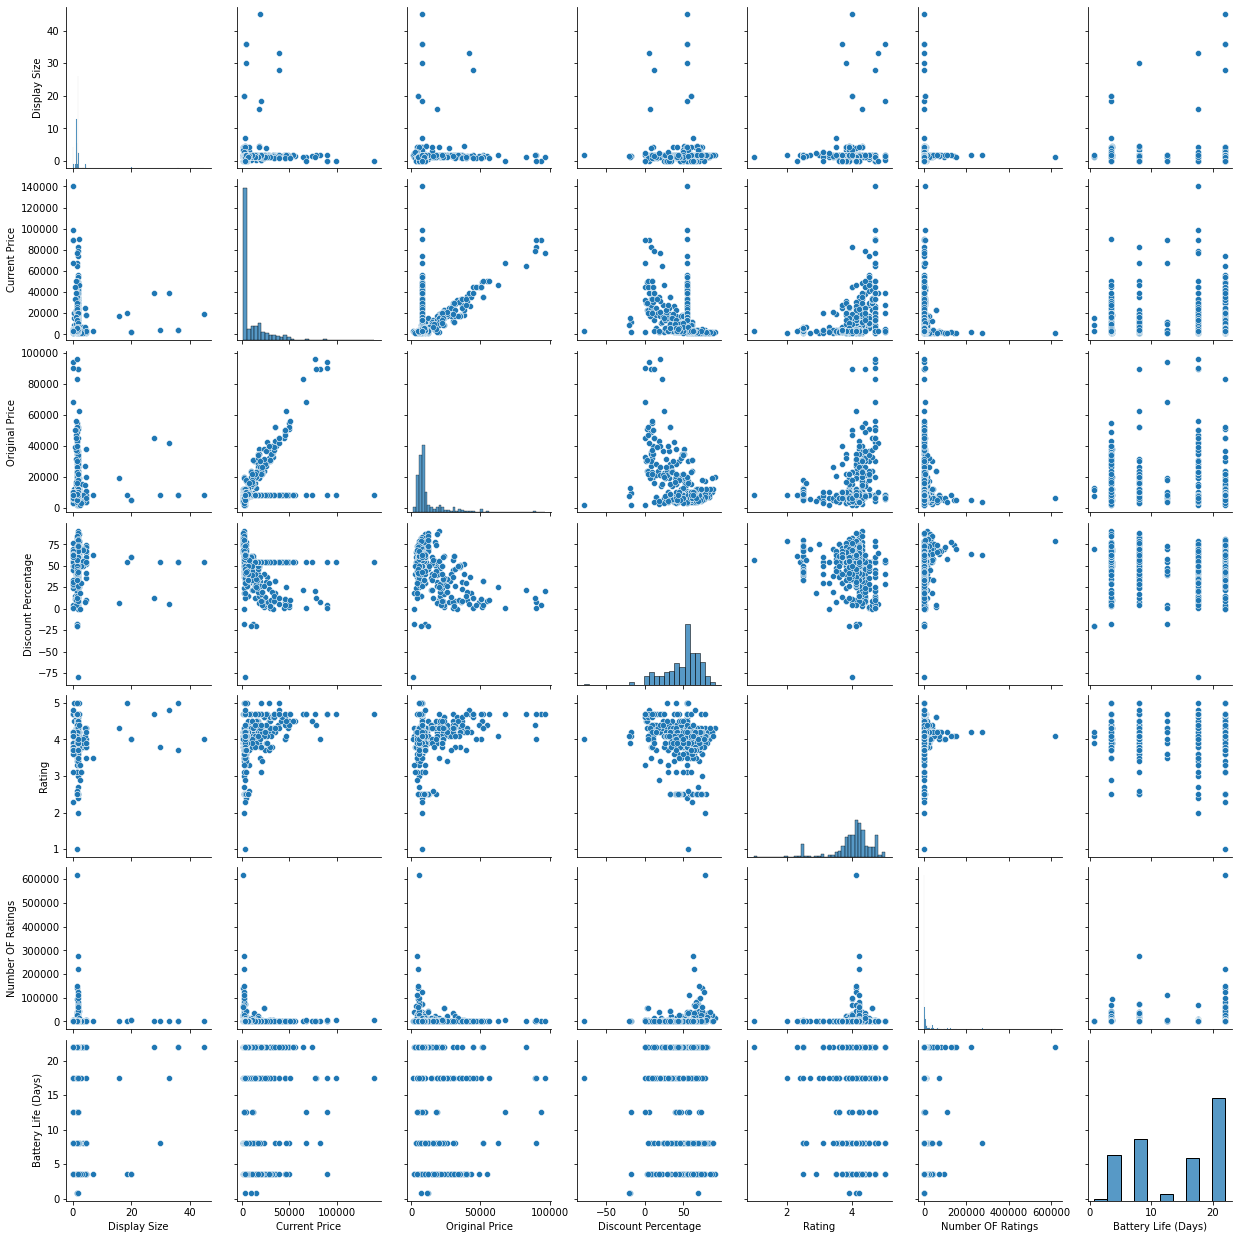

In [140]:
#plt.figure(figsize=(10,5))
#plt.title("Pair Plot")
sns.pairplot(updatedData.drop('Serial Number', axis=1).select_dtypes(exclude =object))
plt.show()

The pair plot conveys the data is not normally distrubeted , no strong correlation appear except discount, current price and origina price

### Rating vs Current Price

In [142]:
stats.spearmanr(updatedData['Rating'],updatedData['Current Price'])

SpearmanrResult(correlation=0.44996698543219854, pvalue=8.136829292480938e-24)

### Rating vs Discount Percentage

In [143]:
stats.spearmanr(updatedData['Rating'],updatedData['Discount Percentage'])

SpearmanrResult(correlation=-0.22253788049922255, pvalue=1.865036794998734e-06)

### Rating vs Original Price

In [144]:
stats.spearmanr(updatedData['Rating'],updatedData['Original Price'])

SpearmanrResult(correlation=0.31681422647008495, pvalue=5.986598851714032e-12)

The spearmant test of rating with current price, discount percentage and orginal price shows that p value is very less , we rejet null hypothesis and concludes that the current price, original price, and dicount impacts the rating

All variable impacts ratings positively but current price impacts most compare to discount percentage and original price. 

# Conclusion

From above anlysis of smart watches several key points were observed that are mentioned below.


Brands like Apple, Ambrane, fitbit Huawei provides posses very good rating
while rating of zebronics, fire-bolt, is very less.

While comparing battery life brand like Apple, Ambrane, Garmin, Dizo lies 
at the top while Samsung, fitbit, Gizmorea and Hammer perform poor.

Touchscreen and Bluetooth feature impacts the rating of the watch.
People are more likely to rate the watches very good if the touchscreen and Bluetooth
feature is not there in the watch. 

The data of rating is not distribute normally, so preferred non parametric method 
to investigate further about the data 

From Kruskal test it is observed that dial shape impacts rating. Post hoc analysis
using Dunn's test proves that the rectangle over circular, circular over square,
curved over oval, curved over square dial are more likely to rate higher by the end user.
In other words Rectangle and Curved shape effects the rating postivily.

Further investing via Kruskal test about the brand confirms ratings vary with brand. 

Spearman test confirms that rating and battery life is not related linearly
. However, ratings are impacted by the current price positively which conveys higher price is linked to good rating